This notebook loads a csv file generated from simulations of a protein.
Technically we should have csvs for under two sets of conditions (traj3_scored and traj7_scored), but I'm fixing a bug

In any regard, each csv contains time-averaged properties such as Rg (radius of gyration) and RMSF (root mean square fluctuations) for tens of proteins. Each line of the csv represents on protein.

We would like to predict which proteins will fold (e.g. have an RgEnd below a cutoff value of say 18), based on properties reported in this csv file. 
Note that the RgEnd is an output, not a feature used for the prediction. 

Ultimately, I load the data, create a new property called 'isFolded' and proceed to separate the data into inputs (X) and outputs (Y), of which the latter corresponds to the isFolded property value (True/False). X is informed from a feature set defined below. 

I used a decision tree as one of many machine learning approaches that can be tested. 

For the time being, the traj*_scored.csv files will be stored in the repo along with the code


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

#### Loading data set

In [2]:
dfa = pd.read_csv( "traj3_scored.csv" )
len(dfa.index)

30

In [3]:
dfa.head()

,Unnamed: 0,Unnamed: 0.1,copy,fasta,binEdges,RgHist,RgStart,RgEnd,RMSF,negative
0,0,0,0,MGTESGDPEEEELEEEEELVDPLETTVREQCEQLDEKCVKARERLE...,[10. 11. 12. ... 18. 19. 20.],13.0,17.629680,13.458850,6.301747,0.241758
1,1,1,1,MGTESGDPEEEELEEEEELVDPLETTVREQCEQLDEKCVKARERLE...,[10. 11. 12. ... 18. 19. 20.],12.0,17.672291,12.476428,5.412555,0.241758
2,2,2,2,MGTESGDPEEEELEEEEELVDPLETTVREQCEQLDEKCVKARERLE...,[10. 11. 12. ... 18. 19. 20.],13.0,17.606146,14.193896,5.673626,0.241758
3,3,3,3,MGTESGDPEEEELEEEEELVDPLETTVREQCEQLDEKCVKARERLE...,[10. 11. 12. ... 18. 19. 20.],13.0,17.621758,13.790629,3.942018,0.241758
4,4,4,4,MGTESGDPEEEELEEEEELVDPLETTVREQCEQLDEKCVKARERLE...,[10. 11. 12. ... 18. 19. 20.],14.0,17.652820,15.384474,5.677054,0.241758


### "inject answers"
This is a placeholder until I get statistics from the other dataset

In [4]:
dfb=dfa.copy()

In [5]:
ar =dfb['RgStart']
ar*=1.5
dfb['RgStart']=ar

ar =dfb['RgEnd']
ar*=1.35
dfb['RgEnd']=ar



### Apply threshold criterion 

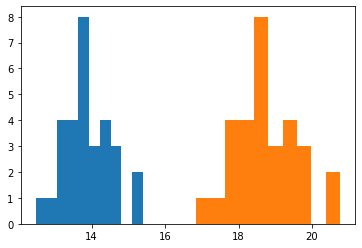

In [6]:
plt.hist(dfa['RgEnd'],label="A")
plt.hist(dfb['RgEnd'],label="B")

cutoff = 18.

In [7]:
df = pd.concat([dfa,dfb])
df['isFolded']=np.where(df['RgEnd']<cutoff,True,False)


### Create inputs/outputs for ML
We wish to use scalar data, so we are just going to select a subset of features here

In [9]:
feature_cols = ["RgHist","RgStart","RgEnd","RMSF","negative"]
#feature_cols = ["RgStart","RgEnd"]
X = df[feature_cols]
y = df.isFolded

### Learning
borrowed from https://www.datacamp.com/tutorial/decision-tree-classification-python

In [10]:
import sklearn 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, random_state=1) 

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


### Display

In [14]:
!pip3 install six

In [15]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [16]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

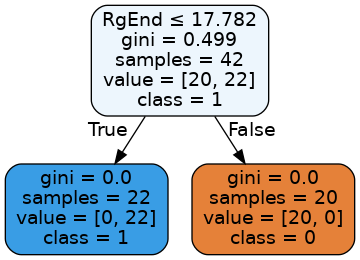

In [17]:
#graph.write_png('diabetes.png')
Image(graph.create_png())